In [6]:
import numpy as np
np.arange(0,0.2,0.01)

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19])

In [7]:
a = np.array([[1],[2],[3]])
b = np.array([[[1],[2],[3]],[[4],[5],[6]]])
print(a.shape,b.shape)
np.hstack((b,a))

(3, 1) (2, 3, 1)


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 3 dimension(s) and the array at index 1 has 2 dimension(s)

In [ ]:
rhoL = 1;uL= 0.75;pL=1;
GAMMA=1.4
E = rhoL*(uL**2/2+pL/((GAMMA-1)*rhoL))
E

2.7812500000000004

In [ ]:
(E/rhoL-uL**2/2)*((GAMMA-1)*rhoL)

1.0

In [ ]:
(E/rhoL-uL**2/2)

2.5000000000000004

In [ ]:
a = np.load('./result.npy')

In [ ]:
a[:,28:31]

array([[[ 1.        ,  0.75      ,  2.78125   ],
        [ 1.        ,  0.75      ,  2.78125   ],
        [ 0.125     ,  0.        ,  0.25      ]],

       [[ 1.        ,  0.75      ,  2.78125   ],
        [-0.13595735, -0.87528621, -1.01800699],
        [ 1.26095735,  1.62528621,  4.04925699]],

       [[ 1.        ,  0.75      ,  2.78125   ],
        [-0.13595735, -0.87528621, -1.01800699],
        [ 1.01255464,  1.18700272,  3.13409431]],

       [[ 1.        ,  0.75      ,  2.78125   ],
        [-0.13595735, -0.87528621, -1.01800699],
        [ 0.84661627,  0.85612737,  2.46063705]],

       [[ 1.        ,  0.75      ,  2.78125   ],
        [-0.13595735, -0.87528621, -1.01800699],
        [ 0.72294664,  0.6222957 ,  1.9890873 ]],

       [[ 1.        ,  0.75      ,  2.78125   ],
        [-0.13595735, -0.87528621, -1.01800699],
        [ 0.62965269,  0.45301419,  1.65497224]],

       [[ 1.        ,  0.75      ,  2.78125   ],
        [-0.13595735, -0.87528621, -1.01800699],
        

In [ ]:
from Riemann_solver import HLLC_Riemann_Solver,U2W,W2U
import numpy as np
WL = U2W(np.array([ 1.        ,  0.75      ,  2.78125   ]))
Wm = U2W(np.array([ 1.        ,  0.75      ,  2.78125   ]))
WR = U2W(np.array([ 0.125     ,  0.        ,  0.25      ]))

Fp = HLLC_Riemann_Solver(Wm,WR)
#Fm = HLLC_Riemann_Solver(WL,Wm)
print(Fp)

[0.94663113 1.35440518 3.16604749]


In [ ]:
import CFD_Euler_1D.Euler_FV_scheme as CFD
UL = W2U(WL)
Um = W2U(Wm)
UR = W2U(WR)
Fp = CFD.HLLC_solver(Um,UR,0)
#Fm = CFD.HLLC_solver(UL,Um,0)
print(Fp)

[0.94663113 1.86821095 3.76342394]


In [ ]:
mesh=options['mesh']['cellX']
mesh_exact = np.linspace(np.min(mesh), np.max(mesh), int(2e3))
exactsol = Riemann_exact(t=time[-1], g=gamma,
                         Wl=np.array([rho_0[0], u_0[0], P_0[0]]),
                         Wr=np.array([rho_0[-1], u_0[-1], P_0[-1]]),
                         grid=mesh_exact)
rho_exact = exactsol[0]
u_exact = exactsol[1]
P_exact = exactsol[2]


plt.figure()
plt.plot(mesh_exact, rho_exact, color='r', label='exact')
plt.plot(mesh, rho[:,-1], color='b', label='simulation', marker='+', linestyle='')
plt.xlabel('x (m)')
plt.ylabel(r'$\rho$ (kg.m$^{-3}$)')
plt.title('Density')
plt.legend()
plt.xlim(-1,1); plt.ylim(0,1.1); plt.grid()

In [ ]:
import numpy as np
import astropy.units as u
def decide_Q(mass):
    logM = np.log10(mass)
    pr =  10**(-6.405 + 8.882*logM - 2.001*logM*logM)*1e63/u.Gyr
    pr += 10**(-11.472 + 13.091*logM - 3.004*logM*logM)*1e63/u.Gyr
    pr += 10**(-26.747 + 26.061*logM - 6.249*logM*logM)*1e63/u.Gyr
    return pr.to(1/u.s)
mass=50
decide_Q(mass)

<Quantity 7.72337137e+48 1 / s>

In [ ]:
import numpy as np
SUPER_SIZE = 3 # How big is the edge of the super tetrahedron. Depends on input set but not calculated automatically
NUM_POINTS = 100
CUSTOM_SEED = 0

if CUSTOM_SEED != 0: 
    np.random.seed(CUSTOM_SEED)

points = np.random.rand(NUM_POINTS, 3)
import Voronoi_grid as V
import Riemann_solver as R
cells = V.Create_Voronoi(BoxSize=1,points=points)
f_vor = dict()
for key in cells.voronoi.__dict__.keys():
    print('_' in key)
    if key != '_qhull':
        pass
        #f_vor.update({key:cells.__dict__[key]})
print(cells.W_Grid.__name__)
rhoL = 1;uL= 0.75;pL=1;rhoR=0.125;uR=0;pR=0.1;x0 =0.3;dt=0.1
WL = np.array([rhoL,uL,pL])
WR = np.array([rhoR,uR,pR])
FLUX = np.zeros(3)
for face in cells[0].Faces:
    A = np.linalg.norm(face.Areas)
    F = R.HLLC_Riemann_Solver(WL,WR)
    FLUX+=A*F
WL-=dt*FLUX
WL

True
False
True
True
False
True
True
True
False
False
True
True
True


AttributeError: 'numpy.ndarray' object has no attribute '__name__'

In [ ]:
number = 5
formatted_number = '{:03d}'.format(number)
print(formatted_number)  # 输出: 005


005


In [ ]:
import astropy.units as u
import astropy.constants as c
GAMMA=5/3
Boxsize=1
dx=0.1
density_0=1
velocity_radial_0=1
pressure=1
utherm_0=1
X_H=1
mu = 4/(1+3*X_H+4*X_H)
temperature = 10*u.K
#utherm_0=(temperature*c.k_B*3/2/mu/c.m_p)
utherm_0 = pressure / ( GAMMA - 1.0 ) / density_0
#pressure = utherm_0*( GAMMA - 1.0 ) * density_0
CellsPerDimension = int(Boxsize//dx)
NumberOfCells = CellsPerDimension * CellsPerDimension * CellsPerDimension
pos_first, pos_last = 0.5 * dx, Boxsize - 0.5 * dx
Pos = np.random.uniform(pos_first, pos_last,size=(NumberOfCells,3))
## calculate distance from center
xPosFromCenter = (Pos[:,0] - 0.5 * Boxsize)
yPosFromCenter = (Pos[:,1] - 0.5 * Boxsize)
zPosFromCenter = (Pos[:,2] - 0.5 * Boxsize)
Radius = np.sqrt( xPosFromCenter**2 + yPosFromCenter**2 + zPosFromCenter**2 )

""" set up hydrodynamical quantitites """
## mass insetad of density
Mass = np.full(NumberOfCells, density_0.value*dx*dx*dx)
## velocity
Velocity = np.zeros([NumberOfCells,3])
Velocity[:,0] = velocity_radial_0 * xPosFromCenter / Radius
Velocity[:,1] = velocity_radial_0 * yPosFromCenter / Radius
Velocity[:,2] = velocity_radial_0 * zPosFromCenter / Radius
## specific internal energy
Uthermal = np.full(NumberOfCells, utherm_0)

TypeError: 'Cells' object is not iterable

In [ ]:
rhoL = 1;uL= 0.75;pL=1;rhoR=0.125;uR=0;pR=0.1;x0 =0.3;dt=0.1
WL = np.array([rhoL,uL,pL])
WR = np.array([rhoR,uR,pR])
FLUX = np.zeros(3)
for face in cells:
    face.cal_Areas()
    A = np.linalg.norm(face.Areas)
    F = R.HLLC_Riemann_Solver(WL,WR)
    FLUX+=A*F
WL-=dt*FLUX

array([ -654.15017709,  -936.614902  , -2190.17724025])

In [ ]:
%matplotlib qt5
from matplotlib import pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(1):
    a = voro[i].points.copy()
    a.append(a[0])
    ax.plot(*np.array(a).T,ls='--')

In [ ]:
voro[0].cal_centroid()
voro[0].cal_Areas()
print(voro[0].centroid)
print(voro[0].Areas)

[0.55043157 1.04057755 0.33617353]
[-0.68627247  0.25636499 -0.08125234]


In [ ]:
import numpy as np

# 定义矩阵 A 和矩阵 B
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

# 计算矩阵左乘的结果
result = np.dot(A, B)

print("矩阵左乘的结果:")
print(result)


矩阵左乘的结果:
[[19 22]
 [43 50]]


In [ ]:
np.dot([1,2],[3,4])

11

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi
boxsize=1
# 生成随机点
points = np.vstack((np.random.rand(10**3, 3),[[0,0,0],[1,0,0],[0,1,0],[1,1,0],[0,0,1],[1,0,1],[0,1,1],[1,1,1]]))
print(points)
# 初始化Voronoi图
min_bound = np.array([0, 0, 0])  # 最小边界
max_bound = np.array([1, 1, 1])  # 最大边界
vor = Voronoi(points,incremental=True)
'''
# 使用增量插入法逐步添加点
for i in range(10, 20):
    # 添加新点
    new_point = np.random.rand(1, 3)
    points = np.vstack([points, new_point])
    
    # 更新Voronoi图
    vor.add_points(new_point)'''
#vor.add_points([[0,0]])
#vor.add_points([[0,1]])
#vor.add_points([[1,0]])
#vor.add_points([[1,1]])
# 绘制Voronoi tessellation
#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')

#plt.plot(points[:, 0], points[:, 1],points[:,2],'ko')
#ax.plot(x,y,z,'ko')
f_vor = dict()
for key in vor.__dict__.keys():
    if key != '_qhull':
        print(key)
        f_vor.update({key:vor.__dict__[key]})
import pickle
with open("./testvor.pkl", "wb") as f:
    pickle.dump(f_vor, f)
with open("./testvor.pkl", "rb") as f:
    loaded_variable = pickle.load(f)
loaded_variable.vertices

[[0.16729884 0.73029355 0.48635045]
 [0.8196431  0.14675701 0.00667145]
 [0.24448553 0.65660526 0.94889169]
 ...
 [1.         0.         1.        ]
 [0.         1.         1.        ]
 [1.         1.         1.        ]]
vertices
ridge_points
ridge_vertices
regions
point_region
_ridge_dict
_points
ndim
npoints
min_bound
max_bound
furthest_site


AttributeError: 'dict' object has no attribute 'vertices'

In [ ]:
%matplotlib qt5
fig = plt.figure()
#ax = fig.add_subplot(111,)
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(0,1)
ax.set_ylim(0,1)

ax.scatter(*vor.points.T,c='grey',alpha=0.5)
#ax.scatter(*np.array(vor.vertices).T)
def find_face(vor,i):
    pos = vor.points
    ax.scatter(*pos[i],c='r',marker='*')
    ridge_points_index =  np.argwhere(vor.ridge_points == i)[:,0]
    color = 0
    for j in ridge_points_index:
        face_vertice = vor.ridge_vertices[j]
        print('face vertice index order:',face_vertice)

        pos_index=vor.ridge_points[j]
        ax.scatter(*pos[pos_index[pos_index!=i]].T,ls='--' ,c='r')
        print(vor.vertices[face_vertice])
        ax.plot(*vor.vertices[face_vertice].T,c='r')
        color+=1
def get_region(vor,i):
    pos = vor.points
    ax.scatter(*pos[i],c='r')
    index = vor.point_region[i]
    print(index)
    index = vor.regions[index]
    print(vor.ridge_points[index])
    region_vertice=np.vstack((vor.vertices[index],vor.vertices[index][0]))
    ax.plot(*np.array(region_vertice).T)
    
find_face(vor,2)
#get_region(vor,1)

face vertice index order: [1463, 2563, 2561, 2533, 2536]
[[0.88037481 0.41113475 0.81967772]
 [0.87650512 0.43579031 0.81692564]
 [0.88842273 0.47290739 0.82166265]
 [0.97680164 0.42956481 0.86732776]
 [0.94922034 0.39240034 0.85475297]]
face vertice index order: [2050, 2560, 2561, 2533, 2535]
[[0.90153843 0.48305844 0.81233913]
 [0.88609702 0.47691275 0.81767959]
 [0.88842273 0.47290739 0.82166265]
 [0.97680164 0.42956481 0.86732776]
 [0.99532504 0.43748761 0.86038694]]
face vertice index order: [2058, 2562, 2560, 2050]
[[0.91028038 0.49824497 0.75811548]
 [0.87704016 0.47658059 0.80650011]
 [0.88609702 0.47691275 0.81767959]
 [0.90153843 0.48305844 0.81233913]]
face vertice index order: [2041, 2039, 2538, 2537]
[[0.90065118 0.37603805 0.80205124]
 [0.94564817 0.38054188 0.73487405]
 [1.14426061 0.41383563 0.72568918]
 [0.94938222 0.38651883 0.84931813]]
face vertice index order: [2041, 1463, 2536, 2537]
[[0.90065118 0.37603805 0.80205124]
 [0.88037481 0.41113475 0.81967772]
 [0.94922

In [ ]:
vor.point_region[:-8]

array([ 5,  4, 13,  3,  9,  8, 10, 17,  7, 14])

In [ ]:
np.array(vor.regions)[vor.point_region[:-8]]

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (18,) + inhomogeneous part.

In [ ]:
points = np.random.rand(10, 3)

# 定义边界框
min_bound = np.array([0, 0, 0])  # 最小边界
max_bound = np.array([1, 1, 1])  # 最大边界

# 将点限制在边界框内
points = np.clip(points, min_bound, max_bound)

In [ ]:
points

array([[0.81747781, 0.72084137, 0.21565951],
       [0.43162428, 0.09412515, 0.43931197],
       [0.09517447, 0.15561554, 0.38002954],
       [0.5200461 , 0.56584758, 0.6530634 ],
       [0.62385381, 0.24502912, 0.03947123],
       [0.04617209, 0.68308886, 0.79837655],
       [0.58660003, 0.20706766, 0.9683043 ],
       [0.83823748, 0.74868108, 0.48151551],
       [0.38096115, 0.56689626, 0.56289714],
       [0.8975854 , 0.54830418, 0.06914291]])

In [ ]:
import h5py
IC = h5py.File('./IC.hdf5','r')
for key in IC.keys():
    print(IC[key].name,IC[key].keys())

/Gas <KeysViewHDF5 ['Coordinates', 'Masses', 'ParticleIDs', 'Pressure', 'Velocities']>
/Header <KeysViewHDF5 []>


In [ ]:
IC['Header'].attrs['BoxSize']

1

In [ ]:
IC.close()

In [ ]:
import numpy as np
from scipy.spatial.transform import Rotation

# 定义给定的向量
target_vector = np.array([1, 1, 0])

# 计算旋转矩阵
# 首先计算给定向量与 x 轴之间的旋转角度
angle = np.arccos(np.dot(target_vector, [1, 0, 0]) / (np.linalg.norm(target_vector) * np.linalg.norm([1, 0, 0])))
# 然后计算旋转轴，即给定向量与 x 轴的叉乘
axis = np.cross([1, 0, 0], target_vector)/np.linalg.norm(np.cross([1, 0, 0], target_vector))
# 创建旋转对象
rotation = Rotation.from_rotvec(angle * axis)

# 定义需要旋转的向量
vector_to_rotate = np.array([1, 1, 0])

# 将旋转对象应用于向量
rotated_vector = rotation.apply(vector_to_rotate)
print("原始向量:", vector_to_rotate)
print("旋转后的向量:", rotated_vector)
rotation.apply(rotated_vector,inverse=True)

原始向量: [1 1 0]
旋转后的向量: [-1.11022302e-16  1.41421356e+00  0.00000000e+00]


array([1., 1., 0.])

In [ ]:
a = np.array([[np.nan,np.nan]])
np.isnan(a)

array([[ True,  True]])

In [ ]:
import astropy.units as u
import astropy.constants as c
((5*u.pc).to(u.km)/(1000*u.km/u.s)).to(u.yr)

<Quantity 4888.9611084 yr>

In [ ]:

((u.m/u.s)**2/c.G).to(u.g/u.cm**3)

UnitConversionError: 'kg / m' (linear density) and 'g / cm3' (mass density) are not convertible

In [ ]:
from Voronoi_grid import Load_VoronoiMesh_Data,VoronoiMesh
voro = Load_VoronoiMesh_Data('./output/snapshot001')
cells = VoronoiMesh(voro,load=True)
W2U(cells.W_Grid.T).T.shape

(729, 5)

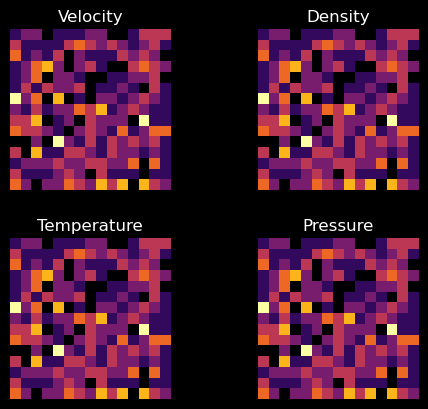

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
import h5py
import astropy.units as u
import astropy.constants as c
import assistlgh as alg
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from matplotlib.animation import FFMpegWriter
from Voronoi_grid import Load_VoronoiMesh_Data,VoronoiMesh
from Riemann_solver import W2U
output_dir = 'output/'
simulation_dictionary = './'+output_dir
import re
import pandas as pd

units_m = c.M_sun.value*u.g
units_l = (1*u.pc).value*u.cm
units_v = 1*u.cm/u.s
units_t = units_l/units_v
units_e = (units_v**2).cgs
fig,ax = plt.subplots(2,2,facecolor='black')
fig.subplots_adjust(hspace=0.3,wspace=0)
ax = ax.reshape(-1)
def get_grid(datapoint,particle_values,grid_resolution,ax):
    grid, x_edges, y_edges = np.histogram2d(datapoint[:, 0], datapoint[:, 1], bins=grid_resolution, weights=particle_values)
    ax.imshow(grid.T,origin='lower',cmap='inferno')
    return grid
def update(i):
    alg.visualize.progress_bar(i,filenumber,notes=str(i)+'/'+str(filenumber))
    for axindex in range(len(ax)):
        ax[axindex].cla()
        ax[axindex].cla()
        ax[axindex].axis('off')
    ax[0].set_title('Velocity'   ,color='w')
    ax[1].set_title('Density'    ,color='w')
    ax[2].set_title('Temperature',color='w')
    ax[3].set_title('Pressure'   ,color='w')
    voro = Load_VoronoiMesh_Data(simulation_dictionary+'snapshot{:03d}'.format(i))
    cells = VoronoiMesh(voro,load=True)
    OUT = h5py.File('./IC.hdf5','r')
    #fig.suptitle('t-'+r'$t_{SN}$'+'={:.1f}Myr'.format(time*0.1),color='w',y=0.5)
    grid_resolution =15
    datapoint = cells.voronoi.points.T
    BoxSize = OUT['Header'].attrs['BoxSize']
    mask = np.logical_and(datapoint[2]>BoxSize/2-0.2,datapoint[2]<BoxSize/2+0.2)
    particle_values = np.linalg.norm(cells.W_Grid[:,1:4][mask],axis=1)
    get_grid(datapoint.T[mask],particle_values,grid_resolution,ax[0])
    particle_values = cells.W_Grid[:,0][mask]
    get_grid(datapoint.T[mask],particle_values,grid_resolution,ax[1])
    temperature = (W2U(cells.W_Grid.T).T[:,-1]*units_e*2/3*c.m_p/c.k_B*(1/2*1+1/2)).to(u.K)
    particle_values = temperature[mask].value
    get_grid(datapoint.T[mask],particle_values,grid_resolution,ax[2])
    particle_values = cells.W_Grid[:,-1][mask]
    get_grid(datapoint.T[mask],particle_values,grid_resolution,ax[3])
    OUT.close()
    #plt.colorbar(label='Mass')
    return fig

filenumber=10
ani = FuncAnimation(fig,update,frames=filenumber,interval=50)
writer = FFMpegWriter(fps=5, metadata=dict(artist='Me'), bitrate=1800)
ani.save('./'+'video.mp4', writer=writer)


In [ ]:
import astropy.units as u
import astropy.constants as c
import numpy as np
density_0 = (24*u.M_sun/u.pc**3)
Mass = 1.25e4*u.M_sun
((Mass/density_0)*3/4/np.pi)**(1/3)

<Quantity 4.99118178 pc>

In [ ]:
Mass/128**3

<Quantity 0.00596046 solMass>

In [ ]:
for i in range(10):
    voro = Load_VoronoiMesh_Data(simulation_dictionary+'snapshot{:03d}'.format(i))
    cells = VoronoiMesh(voro,load=True)
    print(cells.voronoi.points[4],voro.__dict__['W_Grid'][0])

[0.22689249 0.45588464 0.22035773] [ 1.         -0.81328428 -0.43732634  0.38381551  1.        ]
[0.21685511 0.45426329 0.21008018] [ 1.         -0.81328428 -0.43732634  0.38381551  1.        ]
[0.20179904 0.45183127 0.19466385] [ 1.         -0.81328428 -0.43732634  0.38381551  1.        ]
[0.18674297 0.44939924 0.17924753] [ 1.         -0.81328428 -0.43732634  0.38381551  1.        ]
[0.1716869  0.44696722 0.1638312 ] [ 1.         -0.81328428 -0.43732634  0.38381551  1.        ]
[0.16164952 0.44534587 0.15355365] [ 1.         -0.81328428 -0.43732634  0.38381551  1.        ]
[0.14659345 0.44291384 0.13813733] [ 1.         -0.81328428 -0.43732634  0.38381551  1.        ]
[0.13153737 0.44048182 0.12272101] [ 1.         -0.81328428 -0.43732634  0.38381551  1.        ]
[0.1164813  0.4380498  0.10730468] [ 1.         -0.81328428 -0.43732634  0.38381551  1.        ]
[0.10644392 0.43642845 0.09702713] [ 1.         -0.81328428 -0.43732634  0.38381551  1.        ]


In [ ]:
voro.__dict__['W_Grid']

array([[ 1.        , -0.81328428, -0.43732634,  0.38381551,  1.        ],
       [ 1.        ,  0.86727392, -0.24514205,  0.43329126,  1.        ],
       [ 1.        , -0.17883162, -0.98241967, -0.05358022,  1.        ],
       ...,
       [ 1.        , -0.26376522, -0.94783823, -0.17897094,  1.        ],
       [ 1.        ,  0.41311688, -0.37937128, -0.82789605,  1.        ],
       [ 1.        ,  0.20072394, -0.02780176, -0.97925327,  1.        ]])

In [13]:
import astropy.constants as c
import astropy.units as u
theta = (1*u.arcsecond).to(u.rad)
D = 1.22*20*u.cm/(theta.value)
D.to(u.m)

<Quantity 50328.61272429 m>

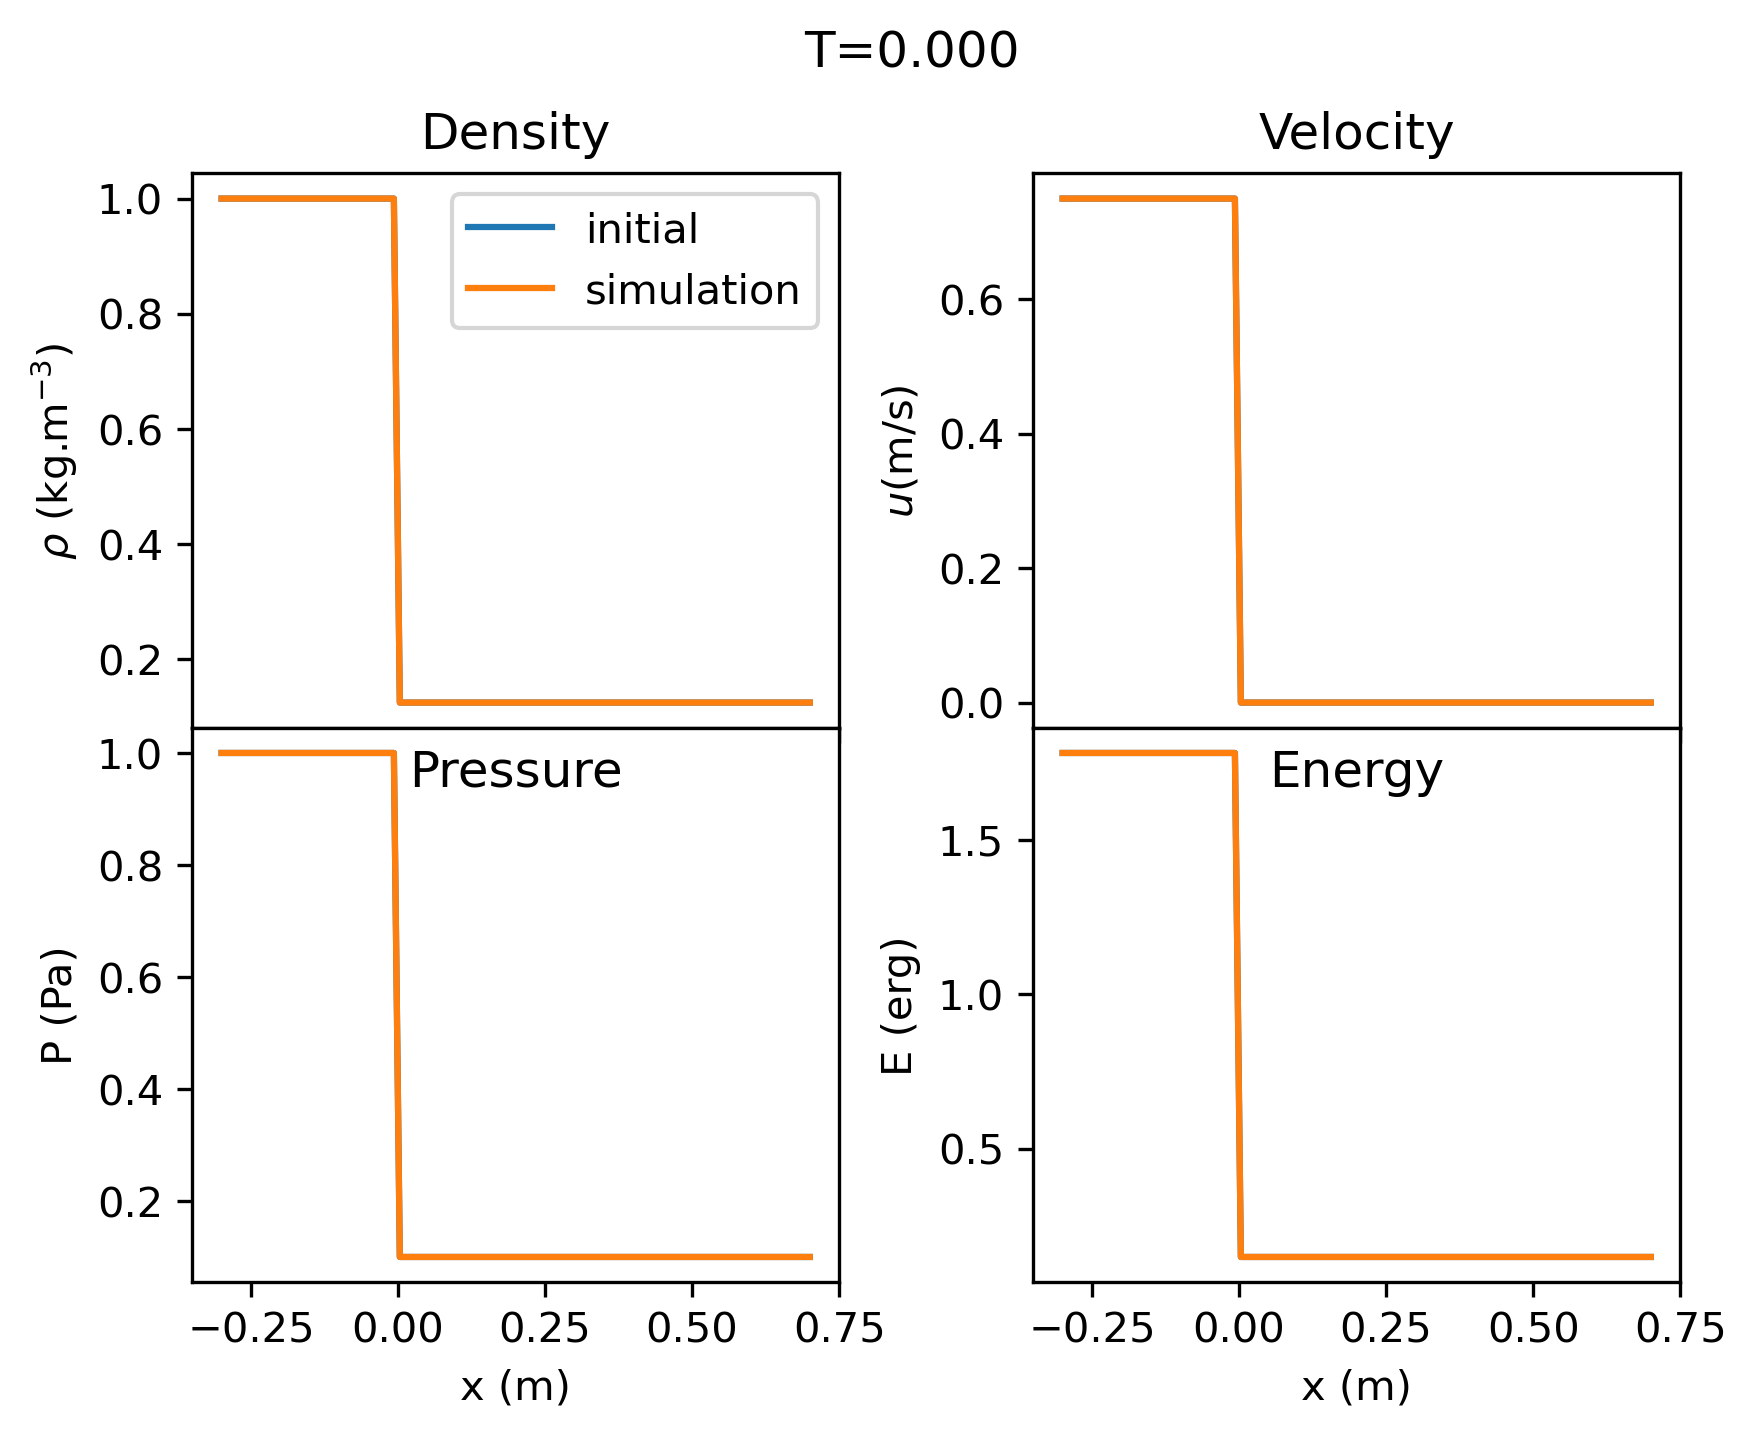

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
import h5py
import astropy.units as u
import astropy.constants as c
import assistlgh as alg
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from matplotlib.animation import FFMpegWriter
from Voronoi_grid import Load_VoronoiMesh_Data,VoronoiMesh
from Riemann_solver import W2U,U2W
fig,ax = plt.subplots(2,2,sharex=True,dpi=300)
fig.subplots_adjust(hspace=0,wspace=0.3)
IC_X=np.linspace(0,1,100)
result = np.load('./result3d.npy')
TT = np.load('./timeseries.npy')
IC_W = U2W(result[0].T,PHI=None).T
PHI = None
IC_U = result[0]
M=100;T=0.2;CFL=0.9
rhoL = 1;uL= 0.75;vL=0;wL=0;pL=1;rhoR = 0.125;uR=0;vR=0;wR=0;pR=0.1;x0 =0.3
def update(i):
    ax[0][0].cla()
    ax[0][1].cla()
    ax[1][0].cla()
    ax[1][1].cla()
    
    fig.suptitle('T={:.3f}'.format(TT[i]))
    ax[0][0].plot(IC_X-x0,IC_W.T[0],label='initial')
    ax[0][1].plot(IC_X-x0,IC_W.T[1])
    ax[1][0].plot(IC_X-x0,IC_W.T[-1]) 
    ax[1][1].plot(IC_X-x0,IC_U.T[-1])
    
    W_final = U2W(np.array(result[i]).T,PHI = None)
    ax[0][0].plot(IC_X-x0,W_final[0],label='simulation')
    ax[0][1].plot(IC_X-x0,W_final[1])
    ax[1][0].plot(IC_X-x0,W_final[-1]) 
    ax[1][1].plot(IC_X-x0,np.array(result[i]).T[-1]) 
    
    ax[0][0].set_xlabel('x (m)')
    ax[0][0].set_ylabel(r'$\rho$ (kg.m$^{-3}$)')
    ax[0][0].set_title('Density')
    ax[0][0].legend()
    
    ax[0][1].set_xlabel('x (m)')
    ax[0][1].set_ylabel(r'$u$(m/s)')
    ax[0][1].set_title('Velocity')

    ax[1][0].set_xlabel('x (m)')
    ax[1][0].set_ylabel('P (Pa)')
    ax[1][0].set_title('Pressure',y=0.85)
    
    ax[1][1].set_xlabel('x (m)')
    ax[1][1].set_ylabel('E (erg)')
    ax[1][1].set_title('Energy',y=0.85)
    
    
filenumber = len(result)
ani = FuncAnimation(fig,update,frames=filenumber,interval=10)
writer = FFMpegWriter(fps=20, metadata=dict(artist='Me'), bitrate=1800)
ani.save('./'+'SODvideo.mp4', writer=writer)

In [10]:
c.G

<<class 'astropy.constants.codata2018.CODATA2018'> name='Gravitational constant' value=6.6743e-11 uncertainty=1.5e-15 unit='m3 / (kg s2)' reference='CODATA 2018'>

In [16]:
units_m = 1.989e+33*u.g
units_l = 3.08568e+18*u.cm
units_v = 977792.222*u.cm/u.s
units_t = units_l/units_v
units_e = (units_v**2).cgs
(c.G).to(units_l**3/units_m/units_t**2).value

4.499833707504337e-05

In [17]:
units_t.to(u.kyr)

<Quantity 100.00007835 kyr>

In [13]:
%matplotlib qt5
import numpy as np
from matplotlib import pyplot as plt
from Voronoi_grid import Create_Voronoi
points=np.random.rand(5**3, 3)
import time
start = time.time()
cells = Create_Voronoi(1,points)
print(time.time()-start)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
cells.show_in_graph(ax,12)
#cells.show_all_face(ax)
plt.show()
celli = cells[0]
celli.alive = False

0.03297257423400879
False


In [11]:
for i in range(10**3):
    face = cells[i].Faces
    for j in range(len(face)):
        a = face[j].Areas
        print(np.dot(a,face[j].adj_points[0]-cells[i].coordinate))

0.1741761335048721
-0.16721252161197964
-0.3534625915627529
-0.10827264092838208
-0.6570512217603941
-0.0014384200915144502
-0.0009098867838052947
-0.6879366215660154
0.0014569790411900012
-0.0002076911960345379
-0.9971981160014475
-0.0006561256061877606
-0.0023385925840710814
-5.991689070869608e-05
-0.0015664981457172266
-0.10711309202979735
0.2698144952003495
-0.4418082127496878
0.101504601688812
-0.7187823541995668
0.0004320080374704157
-0.00020032683067729577
-9.010717104390551e-07
0.00025449179088598715
-0.0007773549167153182
0.0009130988528032618
-0.0005870569700444802
0.0009064516210050624
-2.050949269045211e-05
-0.0004405390436393177
0.0006674888116549134
0.0004932362889030964
-0.00017238380433560208
2.8793435901217747e-05
-0.0003498901046971802
-0.00010899440392038003
-0.0002514547910225975
-3.247427062980672e-05
3.674656549298128e-06
-0.00031913507705147876
6.912388725407647e-05
0.0001901189409989218
0.0003295300729680962
1.8742841985644033e-05
-0.00023511179874213591
0.00020

In [16]:
np.hstack(([[1,2,3],[4,5,6]],[[5],[6]]))

array([[1, 2, 3, 5],
       [4, 5, 6, 6]])

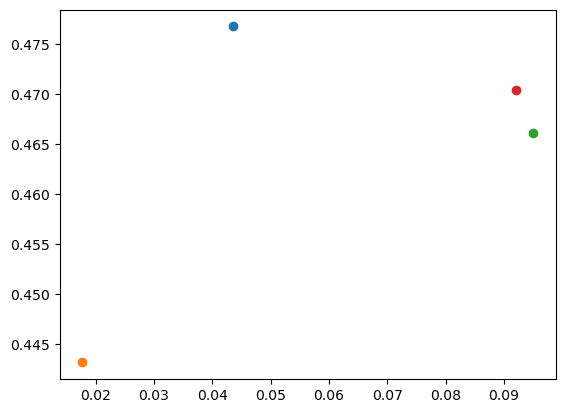

In [8]:

for p in face.Vertices:
    x,y,z = p
    plt.scatter(x,y)

In [21]:
np.empty((3,1))

array([[4.56704072],
       [7.43711229],
       [5.43272191]])